In [1]:
%load_ext autoreload
%autoreload 2

import os

os.environ["CYCLONEDDS_URI"] = "file:///home/FlexivPy/cyclonedds_v0.xml"

In [2]:
from FlexivPy.joy import XBoxController

joy = XBoxController(0)
joy.getStates()

pygame 2.6.1 (SDL 2.28.4, Python 3.10.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
Put your stick at reset and do not touch it while calibrating


{'left_joy': array([ 0., -0.]),
 'right_joy': array([ 0., -0.]),
 'left_trigger': np.float64(0.0004999999999999449),
 'right_trigger': np.float64(0.0004999999999999449),
 'A': 0,
 'B': 0,
 'X': 0,
 'Y': 0,
 'left_bumper': 0,
 'right_bumper': 0,
 'options_left': 0,
 'options_right': 0,
 'left_joy_btn': 0,
 'right_joy_btn': 0}

Before going through the next cells, start the asynchronous simulator or the real robot bridge by tunning the following in your terminal:

**Asynchronous Simulator:**

```bash
flexivpy_async_sim --mode velocity
```

**Real Robot Client**

```bash
CYCLONEDDS_URI=file:///home/FlexivPy/cyclonedds_v0.xml robot_server -cm 3 -g --path /home/FlexivPy/FlexivPy/assets/ -rcf /home/FlexivPy/flexivpy_bridge/config.yaml
```

The `cm` 3 means that the robot is started in joint velocity mode.

** Camera **
```bash
CYCLONEDDS_URI=file:///home/FlexivPy/cyclonedds_v0.xml python FlexivPy/async_camera_app.py

CYCLONEDDS_URI=file:///home/FlexivPy/cyclonedds_v0.xml python FlexivPy/async_camera_app_multiple.py --camera_id 0 1 2

```

waiting to receive the first message from the robot...
Robot is ready!
waiting to receive the image ...
Camera is ready!
waiting to receive the image ...
Camera is ready!
waiting to receive the image ...
Camera is ready!


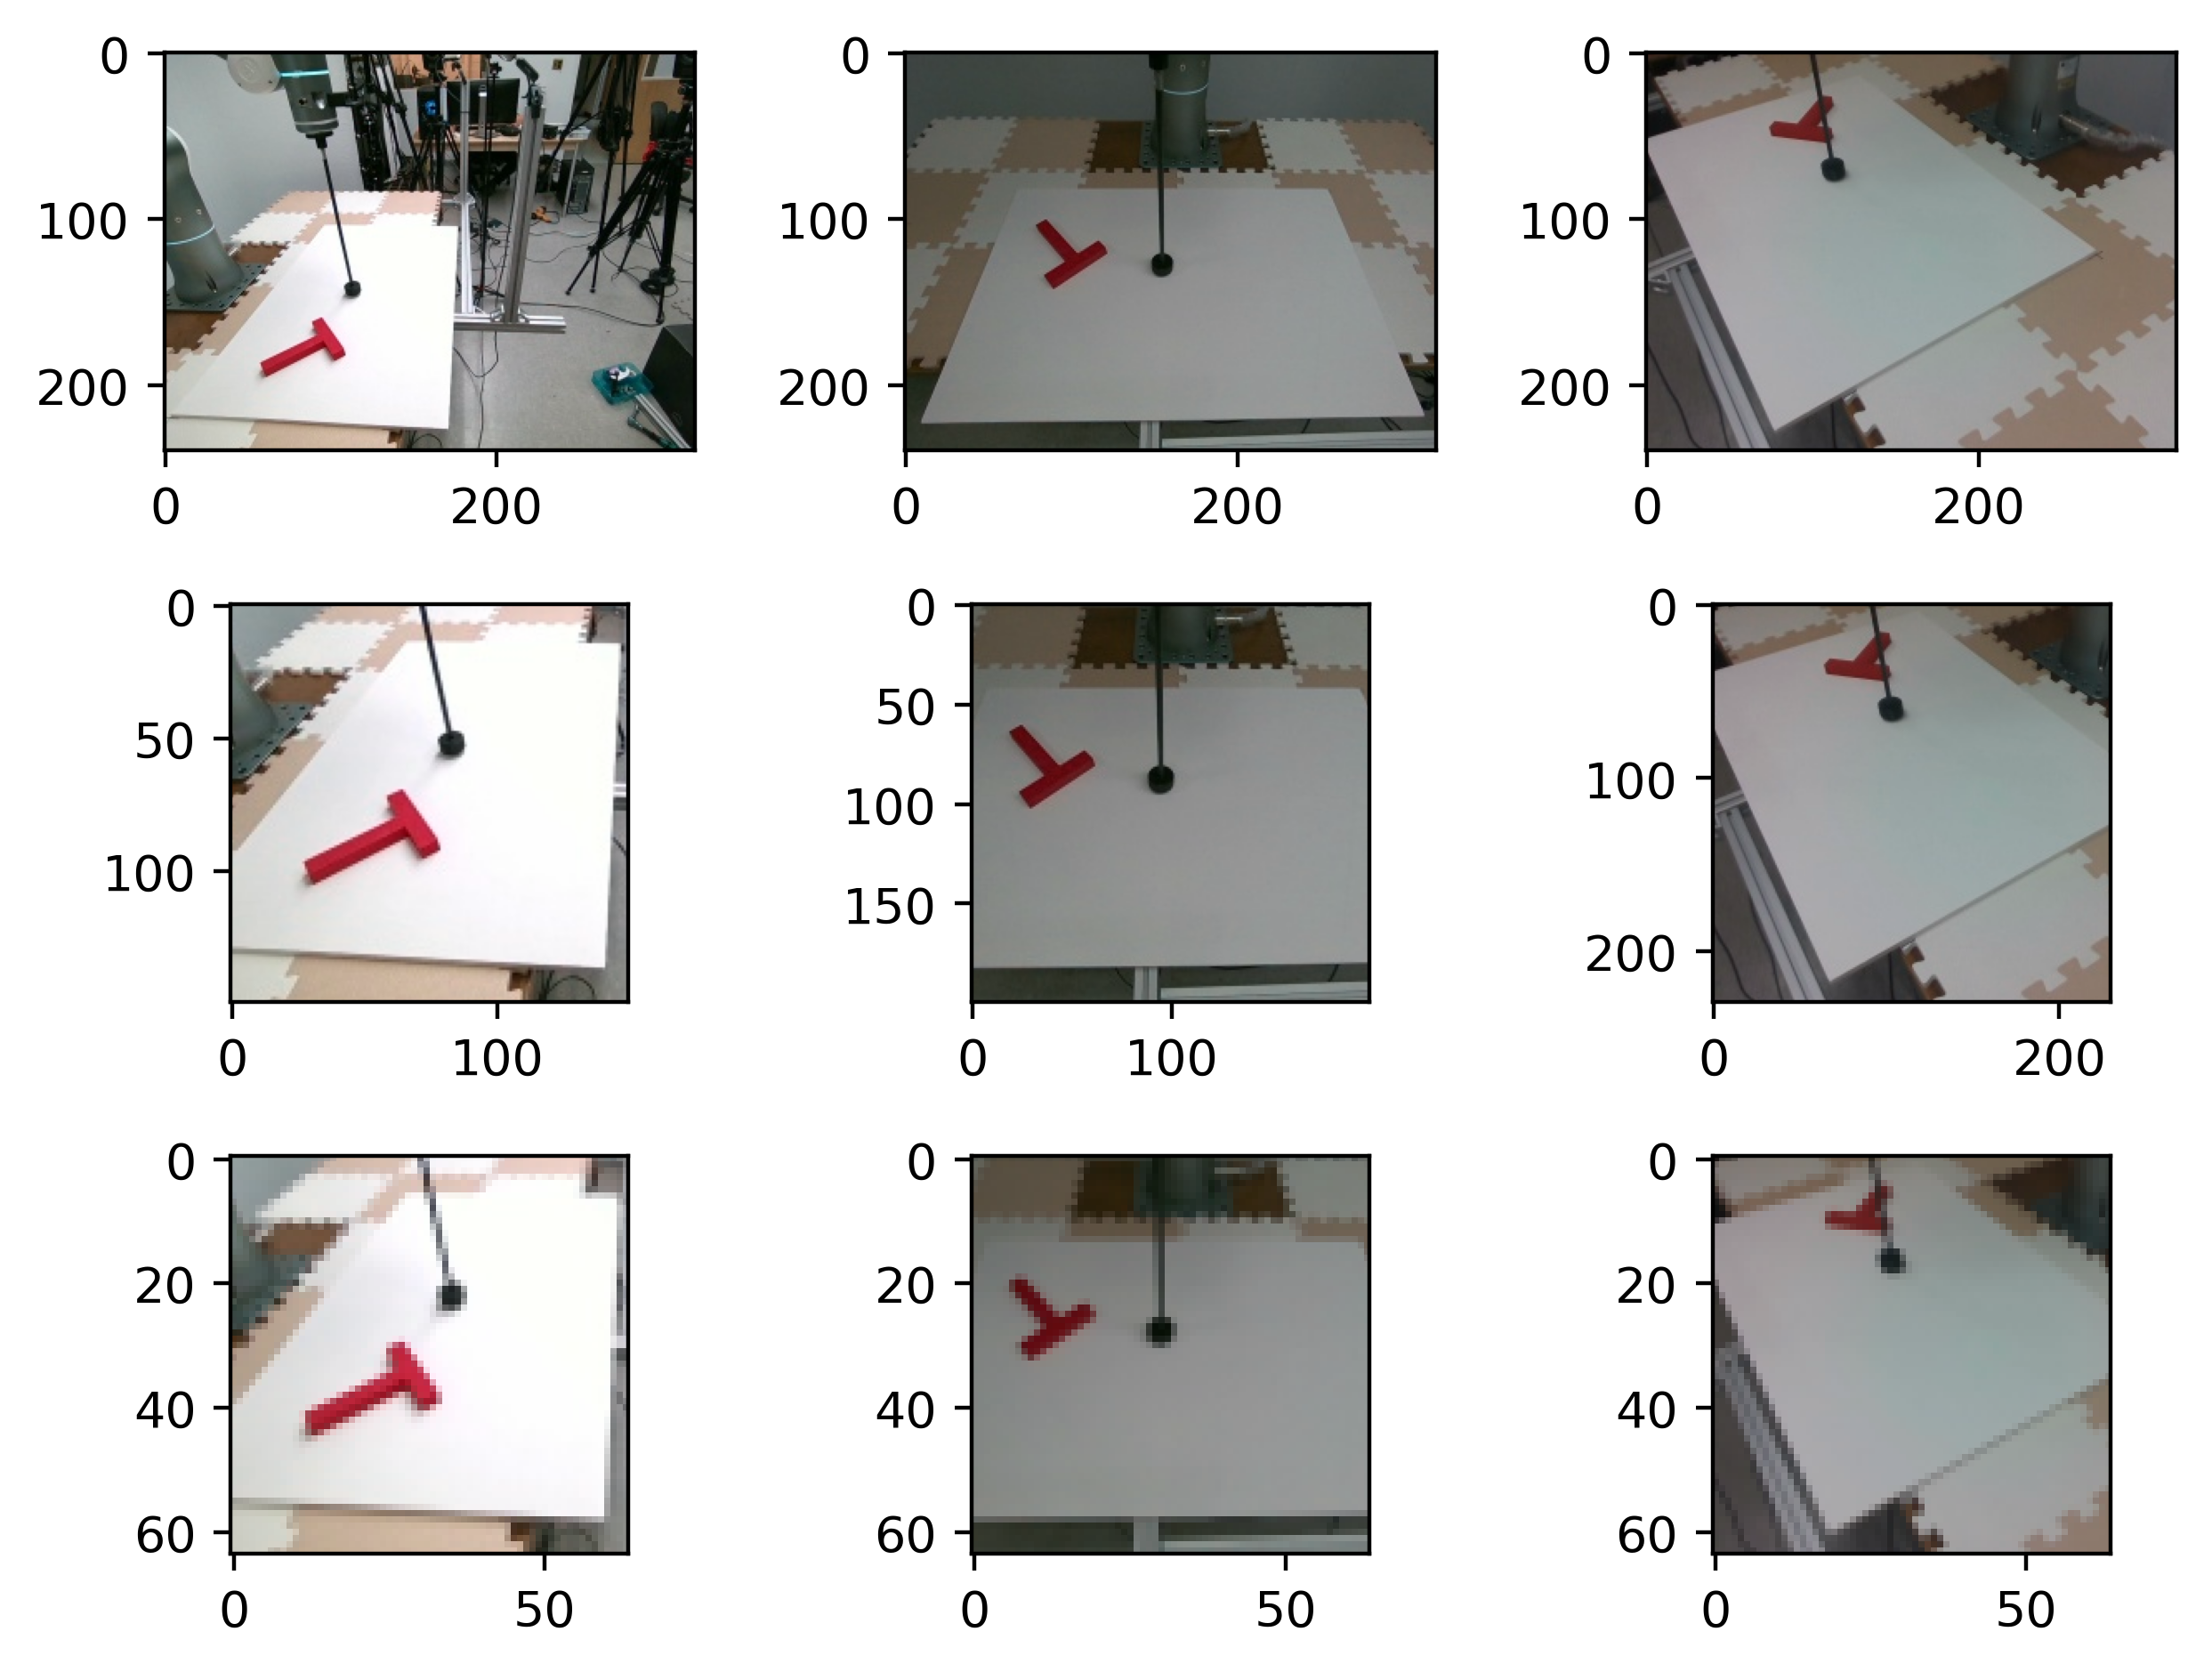

In [3]:
import pinocchio as pin
import numpy as np
from FlexivPy.robot.model.pinocchio import FlexivModel
from FlexivPy.robot.interface import FlexivDDSClient
import time
from FlexivPy.robot.dds.subscriber import get_last_msg
import cv2
from cyclonedds.domain import DomainParticipant
from cyclonedds.topic import Topic
from cyclonedds.sub import Subscriber, DataReader
import time

from cyclonedds.domain import DomainParticipant
from cyclonedds.topic import Topic
from FlexivPy.robot.dds.flexiv_messages import EnvImage
from datetime import datetime
import matplotlib.pyplot as plt
from FlexivPy.camera_dds_client import CameraDDSClient
from functools import partial


model = FlexivModel()
robot = FlexivDDSClient()
# Run this in another terminal!
# python FlexivPy/async_camera_app.py

camera1 = CameraDDSClient(camera_topic="EnvImage_0")
camera2 = CameraDDSClient(camera_topic="EnvImage_1")
camera3 = CameraDDSClient(camera_topic="EnvImage_2")


def cut_image(image, start_x, start_y, size):
    end_y = start_y + size
    end_x = start_x + size

    interest_area = image[start_y:end_y, start_x:end_x]
    if interest_area.shape[0] != size or interest_area.shape[1] != size:
        raise ValueError(
            "Interest area is not the correct size. Expected size: {}, Actual size: {}".format(
                size, interest_area.shape
            )
        )
    interest_area_6464 = cv2.resize(
        interest_area, (64, 64), interpolation=cv2.INTER_AREA
    )
    return interest_area_6464, interest_area


def get_small_image_center(image):

    start_x = 60
    start_y = 40
    size = 200
    end_y = start_y + size
    end_x = start_x + size

    # for camera on the left of the robot.

    print("start_x", start_x)
    print("start_y", start_y)
    print("end_x", end_x)
    print("end_y", end_y)

    interest_area = image[start_y:end_y, start_x:end_x]
    print("interest area", interest_area.shape)
    interest_area_6464 = cv2.resize(
        interest_area, (64, 64), interpolation=cv2.INTER_AREA
    )
    return interest_area_6464, interest_area


def get_small_image_right(image):

    start_x = 30
    start_y = 90
    size = 150
    end_y = start_y + size
    end_x = start_x + size

    # for camera on the left of the robot.

    print("start_x", start_x)
    print("start_y", start_y)
    print("end_x", end_x)
    print("end_y", end_y)

    interest_area = image[start_y:end_y, start_x:end_x]
    print("interest area", interest_area.shape)
    interest_area_6464 = cv2.resize(
        interest_area, (64, 64), interpolation=cv2.INTER_AREA
    )
    return interest_area_6464, interest_area


image1 = camera1.get_env_image()
image2 = camera2.get_env_image()
image3 = camera3.get_env_image()
plt.rcParams["figure.dpi"] = 400


cut_image1 = partial(cut_image, start_x=30, start_y=90, size=150)
cut_image2 = partial(cut_image, start_x=60, start_y=40, size=200)
cut_image3 = partial(cut_image, start_x=10, start_y=10, size=230)

fig, ax = plt.subplots(3, 3)
ax[0, 0].imshow(image1)
ax[0, 1].imshow(image2)
ax[0, 2].imshow(image3)

# rigth camera.
r_64, r_interest = cut_image1(image1)
c_64, c_interest = cut_image2(image2)
l_64, l_interest = cut_image3(image3)

ax[1, 0].imshow(r_interest)
ax[1, 1].imshow(c_interest)
ax[1, 2].imshow(l_interest)


ax[2, 0].imshow(r_64)
ax[2, 1].imshow(c_64)
ax[2, 2].imshow(l_64)
# tigth layout
plt.tight_layout()
plt.show()


# plt.imshow(np.concatenate((image1, get_small_image_center(image2), image3), axis=1))

In [ ]:
import pinocchio as pin
import numpy as np
from FlexivPy.robot.model.pinocchio import FlexivModel
from FlexivPy.robot.interface import FlexivDDSClient
import time
from FlexivPy.robot.dds.subscriber import get_last_msg
import cv2
from cyclonedds.domain import DomainParticipant
from cyclonedds.topic import Topic
from cyclonedds.sub import Subscriber, DataReader
import time

from cyclonedds.domain import DomainParticipant
from cyclonedds.topic import Topic
from FlexivPy.robot.dds.flexiv_messages import EnvImage
from datetime import datetime
import matplotlib.pyplot as plt
from FlexivPy.camera_dds_client import CameraDDSClient


def resize_and_pad(image, max_width, max_height, color=(0, 0, 0)):
    """
    Resizes and pads an image to fit within max_width and max_height while maintaining aspect ratio.

    Parameters:
        image (numpy.ndarray): The input image.
        max_width (int): The maximum width.
        max_height (int): The maximum height.
        color (tuple): The padding color in BGR. Default is black.

    Returns:
        numpy.ndarray: The resized and padded image.
    """
    original_height, original_width = image.shape[:2]

    # Calculate scaling factor to fit the image within max dimensions
    scale = min(max_width / original_width, max_height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)

    # Resize the image
    resized_image = cv2.resize(
        image, (new_width, new_height), interpolation=cv2.INTER_AREA
    )

    # Calculate padding to center the image
    delta_w = max_width - new_width
    delta_h = max_height - new_height
    top = delta_h // 2
    bottom = delta_h - top
    left = delta_w // 2
    right = delta_w - left

    # Apply padding
    padded_image = cv2.copyMakeBorder(
        resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color
    )
    return padded_image


for i in range(1000):
    image1 = camera1.get_env_image()
    image2 = camera2.get_env_image()
    image3 = camera3.get_env_image()

    img_raw = np.concatenate((image1, image2, image3), axis=1)
    r_64, r_interest = cut_image1(image1)
    c_64, c_interest = cut_image2(image2)
    l_64, l_interest = cut_image3(image3)

    r_interest = cv2.resize(r_interest, (64 * 2, 64 * 2), interpolation=cv2.INTER_AREA)
    c_interest = cv2.resize(c_interest, (64 * 2, 64 * 2), interpolation=cv2.INTER_AREA)
    l_interest = cv2.resize(l_interest, (64 * 2, 64 * 2), interpolation=cv2.INTER_AREA)

    img_interest = np.concatenate((r_interest, c_interest, l_interest), axis=1)
    img_64 = np.concatenate((r_64, c_64, l_64), axis=1)

    img_interest = resize_and_pad(img_interest, img_raw.shape[1], img_raw.shape[0])
    img_64 = resize_and_pad(img_64, img_raw.shape[1], img_raw.shape[0])

    img_all = np.concatenate((img_raw, img_interest, img_64), axis=0)

    cv2.imshow("images", img_all)
    cv2.waitKey(1)
    time.sleep(0.1)
cv2.destroyAllWindows()

In [7]:
from FlexivPy.controllers.jointspace import GoJointConfigurationVelocity
from FlexivPy.controllers.runners import blocking_runner

state = robot.get_robot_state()
info = model.getInfo(np.array(state.q), np.array(state.dq))
print(info["poses"]["link7"])
print(state.q)


# homing_controller = GoJointConfigurationVelocity(qgoal=np.array([-0.060038141906261444, -0.1400885432958603, 0.11492829769849777, 2.026796817779541, 0.0031041193287819624, 0.5770605802536011, 0.]))
# blocking_runner(robot, homing_controller)

# default T is :

target_t = np.array(
    [
        [1, 0, 0, 0.48986543],
        [0, -1, 0, -0.08922464],
        [0, 0, -1, 0.65726634],
        [0.0, 0.0, 0.0, 1.0],
    ]
)


q0 = np.array(
    [
        -0.006483817007392645,
        -0.2647894322872162,
        0.1409081667661667,
        1.9820226430892944,
        -0.04699726402759552,
        0.6730022430419922,
        0.1588847041130066,
    ]
)

pre_q0 = np.array(
    [
        -0.060038141906261444,
        -0.1400885432958603,
        0.11492829769849777,
        2.026796817779541,
        0.0031041193287819624,
        0.5770605802536011,
        0.0,
    ]
)

blocking_runner(robot, GoJointConfigurationVelocity(qgoal=pre_q0))
blocking_runner(robot, GoJointConfigurationVelocity(qgoal=q0))

state = robot.get_robot_state()
info = model.getInfo(np.array(state.q), np.array(state.dq))

T0_ref = np.array(
    [
        [1.00000000e00, -2.69497544e-06, 2.74733386e-05, 5.31326556e-01],
        [-2.69558521e-06, -1.00000000e00, 2.21951225e-05, -4.72725715e-02],
        [2.74732787e-05, -2.21951966e-05, -9.99999999e-01, 6.27520138e-01],
        [0.00000000e00, 0.00000000e00, 0.00000000e00, 1.00000000e00],
    ]
)

if np.linalg.norm(T0_ref - info["poses"]["link7"]) > 1e-2:
    print(
        "error in the robot position", np.linalg.norm(T0_ref - info["poses"]["link7"])
    )
    print("The robot is not at the correct position")

[[ 9.99997167e-01  2.31656374e-03  5.47368354e-04  5.32567744e-01]
 [ 2.31577666e-03 -9.99996290e-01  1.43423423e-03  6.24292754e-02]
 [ 5.50688818e-04 -1.43296258e-03 -9.99998822e-01  6.27739019e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[0.14658546447753906, -0.28548792004585266, 0.196494922041893, 1.9628610610961914, -0.0688241645693779, 0.6721798777580261, 0.3758462071418762]
goal reached
goal reached


In [ ]:
from FlexivPy.controllers.taskspace import DiffIKController
import imageio
import pickle
import numpy as np
from PIL import Image
import pathlib

from datetime import datetime
import json
from concurrent.futures import ThreadPoolExecutor
from zoneinfo import ZoneInfo
from FlexivPy.controllers.runners import NonBlockingRunner, blocking_runner

max_v = 0.35


class Get_T_from_controller_no_drift:
    def __init__(self, T0=None):
        self.T0 = T0
        # Initialize the desired pose
        self.x0 = 0
        self.y0 = 0.0
        self.z0 = 0.0
        self.R0 = np.eye(3)

    def __call__(self, state):

        if self.T0 is None:
            info = model.getInfo(np.array(state.q), np.array(state.dq))
            self.T0 = info["poses"]["link7"]

        rate = 0.25 / 100.0

        joy_state = joy.getStates()
        left_joy = joy_state["left_joy"]
        right_joy = joy_state["right_joy"]

        if joy_state["right_bumper"] == 0:
            vx_cmd = -1 * right_joy[1]
            vy_cmd = -1 * right_joy[0]
            vz_cmd = 1 * left_joy[0]

            if vx_cmd > max_v:
                vx_cmd = max_v
            if vx_cmd < -max_v:
                vx_cmd = -max_v
            if vy_cmd > max_v:
                vy_cmd = max_v
            if vy_cmd < -max_v:
                vy_cmd = -max_v

            print("v")
            print(vx_cmd, vy_cmd, vz_cmd)

            # print("vz_cmd", vz_cmd)
            if np.abs(vx_cmd) < 0.1:
                vx_cmd = 0
            if np.abs(vy_cmd) < 0.1:
                vy_cmd = 0
            if np.abs(vz_cmd) < 0.1:
                vz_cmd = 0
            self.y0 = self.y0 + vy_cmd * rate
            self.x0 = self.x0 + vx_cmd * rate
            self.z0 = self.z0 - vz_cmd * rate
        else:
            wx_cmd = right_joy[1]
            wy_cmd = right_joy[0]
            wz_cmd = left_joy[0]
            if np.abs(wx_cmd) < 0.1:
                wx_cmd = 0
            if np.abs(wy_cmd) < 0.1:
                wy_cmd = 0
            if np.abs(wz_cmd) < 0.1:
                wz_cmd = 0
            cmd = np.array([wx_cmd, wy_cmd, wz_cmd])
            omega_hat = np.array(
                [[0, -cmd[2], cmd[1]], [cmd[2], 0, -cmd[0]], [-cmd[1], cmd[0], 0]]
            )
            self.R0 = self.R0 @ (np.eye(3) + omega_hat / 100)

        # time.sleep(0.01)
        T_cmd = self.T0 @ np.vstack(
            [
                np.hstack(
                    [self.R0, np.array([self.x0, self.y0, self.z0]).reshape(3, 1)]
                ),
                np.array([0, 0, 0, 1]),
            ]
        )
        return T_cmd


get_T_from_controller_no_drift = Get_T_from_controller_no_drift(T0=T0_ref)

task_controller = DiffIKController(
    model,
    T_cmd_fun=get_T_from_controller_no_drift,
    dt=0.01,
    dq_max=1.0,
    control_mode="velocity",
)


def save_image_pil(im, fout):
    # A helper function to save the image
    im.save(fout)


class CallbackFun:
    def __init__(self, img_dir, img_dir_big=None, max_workers_pool=1):
        self.cmds = []
        self.callback_dt = 0.1
        self.states = []
        self.img_names = []
        self.raw_img_names = []
        self.last_callback_t = -1
        self.img_counter = 0
        self.img_dir = img_dir
        self.img_dir_big = img_dir_big

        # Create a thread pool executor for asynchronous saving
        self.executor = ThreadPoolExecutor(max_workers=max_workers_pool)

    def __call__(self, robot, cmd, _):
        tic = time.time()
        if tic - self.last_callback_t > self.callback_dt:
            self.last_callback_t = tic

            fcam1 = self.img_dir / "cam1" / f"cam1_{self.img_counter:09d}.png"
            fcam2 = self.img_dir / "cam2" / f"cam2_{self.img_counter:09d}.png"
            fcam3 = self.img_dir / "cam3" / f"cam3_{self.img_counter:09d}.png"

            fcam1_big = self.img_dir_big / "img1" / f"img1_{self.img_counter:09d}.jpg"
            fcam2_big = self.img_dir_big / "img2" / f"img2_{self.img_counter:09d}.jpg"
            fcam3_big = self.img_dir_big / "img3" / f"img3_{self.img_counter:09d}.jpg"

            self.img_names.append(
                {"cam1:": str(fcam1), "cam2": str(fcam2), "cam3": str(fcam3)}
            )
            self.raw_img_names.append(
                {
                    "cam1:": str(fcam1_big),
                    "cam2": str(fcam2_big),
                    "cam3": str(fcam3_big),
                }
            )

            self.cmds.append(cmd)
            self.states.append(robot.get_robot_state())

            # store the image as png.
            img1 = camera1.get_env_image()
            img2 = camera2.get_env_image()
            img3 = camera3.get_env_image()

            img1_64, _ = cut_image1(img1)
            img2_64, _ = cut_image2(img2)
            img3_64, _ = cut_image3(img3)

            self.executor.submit(save_image_pil, Image.fromarray(img1_64), fcam1)
            self.executor.submit(save_image_pil, Image.fromarray(img2_64), fcam2)
            self.executor.submit(save_image_pil, Image.fromarray(img3_64), fcam3)

            self.executor.submit(
                save_image_pil,
                Image.fromarray(img1),
                fcam1_big,
            )
            self.executor.submit(
                save_image_pil,
                Image.fromarray(img2),
                fcam2_big,
            )
            self.executor.submit(
                save_image_pil,
                Image.fromarray(img3),
                fcam3_big,
            )

            print("worker size", self.executor._work_queue.qsize())

            self.img_counter += 1


# Get local time zone (replace with your desired time zone if needed)
local_timezone = ZoneInfo("America/New_York")  # Replace with your timezone

# Get current date and time
current_datetime = datetime.now(local_timezone)

# Format the datetime string for folder name
folder_name = current_datetime.strftime("%Y-%m-%d__%H-%M-%S")


img_dir = pathlib.Path("data_t_v0") / folder_name / "img/"
img_raw = pathlib.Path("data_t_v0") / folder_name / "img_raw/"

data_dir = pathlib.Path("data_t_v0") / folder_name / "data/"
img_dir.mkdir(parents=True, exist_ok=True)

(img_dir / "cam1").mkdir(parents=True, exist_ok=True)
(img_dir / "cam2").mkdir(parents=True, exist_ok=True)
(img_dir / "cam3").mkdir(parents=True, exist_ok=True)


data_dir.mkdir(parents=True, exist_ok=True)
img_raw.mkdir(parents=True, exist_ok=True)

(img_raw / "cam1").mkdir(parents=True, exist_ok=True)
(img_raw / "cam2").mkdir(parents=True, exist_ok=True)
(img_raw / "cam3").mkdir(parents=True, exist_ok=True)

callback = CallbackFun(img_dir=img_dir, img_dir_big=img_raw)

status = blocking_runner(robot, task_controller, timeout=30 * 60, callback=callback)

v
0.0 -0.0 0.0
[[ 1.00000000e+00 -2.69497544e-06  2.74733386e-05  5.31326556e-01]
 [-2.69558521e-06 -1.00000000e+00  2.21951225e-05 -4.72725715e-02]
 [ 2.74732787e-05 -2.21951966e-05 -9.99999999e-01  6.27520138e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Exception: The goal pose is too far!

In [9]:
print(len(callback.img_names))
# lets create a video.

import pickle
import numpy as np
from PIL import Image
import pathlib


# imageio.mimsave("tmp.mp4" , np.stack(callback.imgs) , fps=10., codec = "h264")

# save imgs as png.

# img_dir = pathlib.Path("data_t_v0") / folder_name / "img/"
data_dir = pathlib.Path("data_t_v1") / folder_name / "data/"

data_dir.mkdir(parents=True, exist_ok=True)


print("data_dir ", data_dir)

# for i, img in enumerate(callback.imgs) :
#     #
#     im = Image.fromarray(img)
#     fout = img_dir / f"img_{i:09d}.png"
#     img_names.append(str(fout))
#     im.save(fout)

Dataout = {
    "q": [[i for i in x.q] for x in callback.states],
    "dq": [[i for i in x.dq] for x in callback.states],
    "imgs": callback.img_names,
    "raw_imgs": callback.raw_img_names,
}

with open(data_dir / "data.pkl", "wb") as f:
    pickle.dump(Dataout, f)

with open(data_dir / "data.json", "w") as f:
    json.dump(Dataout, f)

1034
data_dir  data_t_v1/2024-12-18__19-29-20/data


TypeError: Object of type PosixPath is not JSON serializable

In [ ]:
# quick prototype of getting images directly with open cv. not well tested.

import cv2
import threading
import matplotlib.pyplot as plt
import time


class QVideoCapture:
    def __init__(self, name):
        self.cap = cv2.VideoCapture(name)
        self.lock = threading.Lock()
        self.running = True  # Flag to control the thread
        self.t = threading.Thread(target=self._reader)
        self.t.start()

    # Grab frames as soon as they are available
    def _reader(self):
        while self.running:
            with self.lock:
                ret = self.cap.grab()
                time.sleep(0.01)
                # sleep
            if not ret:
                # If grabbing fails, perhaps the camera was disconnected
                break

    # Retrieve the latest frame
    def read(self):
        with self.lock:
            ret, frame = self.cap.retrieve()
        return ret, frame

    def release(self):
        self.running = False
        self.t.join()
        self.cap.release()


cap = QVideoCapture(5)
ret, frame = cap.read()

fig, ax = plt.subplots(1, 3)
cap.release()

# convert the i
ax[0].imshow(frame)